In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Define the path to the folder containing the CSV files
folder_path = '/Users/namirsacic/tokenized-assets/data_analysis/processed_data/merged_data'

# Initialize an empty list to store the data frames
df_list = []

# Loop through all the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Read in the CSV file as a data frame and append it to the list
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df_list.append(df)

In [9]:
# Concatenate the data frames
conc_dfs = pd.concat(df_list)

# Display information about the concatenated data frame
print(conc_dfs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198008 entries, 0 to 74116
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1198008 non-null  int64  
 1   id             1198008 non-null  int64  
 2   price          1198008 non-null  float64
 3   size           1198008 non-null  float64
 4   side           1198008 non-null  int64  
 5   liquidation    1198008 non-null  bool   
 6   time           1198008 non-null  object 
 7   datetime       1198008 non-null  object 
 8   day            1198008 non-null  object 
 9   price*size     1198008 non-null  float64
 10  adjusted_size  1198008 non-null  float64
 11  average        1198008 non-null  float64
 12  premium        1198008 non-null  float64
 13  premium*size   1198008 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(3)
memory usage: 129.1+ MB
None


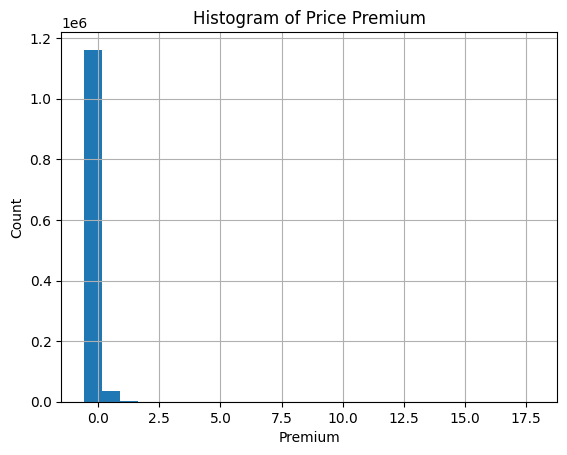

In [10]:
# Create a histogram of the 'premium' column
conc_dfs['premium'].hist(bins=25)

# Add labels and titles to the histogram
plt.title('Histogram of Price Premium')
plt.xlabel('Premium')
plt.ylabel('Count')

# Show the plot
plt.show()

In [11]:
conc_dfs.describe()

,Unnamed: 0,id,price,size,side,price*size,adjusted_size,average,premium,premium*size
count,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06,1.198008e+06
mean,2.437951e+03,3.628093e+09,1.589262e+02,1.139695e+01,1.607335e-02,7.364245e+02,-1.087170e-02,1.563774e+02,1.414715e-02,3.181006e-02
std,1.441166e+03,1.613355e+09,1.403636e+02,9.168551e+01,9.998712e-01,4.774686e+03,9.239114e+01,1.374128e+02,1.175912e-01,2.273438e+00
min,0.000000e+00,1.612524e+08,9.932000e-01,1.000000e-03,-1.000000e+00,4.715000e-02,-2.245890e+04,9.901250e-01,-5.906263e-01,-3.542303e+02
25%,1.187000e+03,2.421044e+09,4.092000e+01,2.000000e-02,-1.000000e+00,2.645500e+00,-2.000000e-01,4.088000e+01,-1.719479e-03,-1.855109e-04
50%,2.405000e+03,3.991259e+09,1.176700e+02,1.900000e-01,1.000000e+00,1.602235e+01,1.000000e-03,1.171024e+02,1.334866e-03,4.339500e-05
75%,3.676000e+03,5.081300e+09,2.400000e+02,2.100000e+00,1.000000e+00,1.783200e+02,1.500000e-01,2.343197e+02,5.836621e-03,2.584612e-03
max,4.999000e+03,5.400950e+09,1.350855e+03,2.245890e+04,1.000000e+00,7.279876e+05,1.472420e+04,1.300231e+03,1.785747e+01,5.440227e+02


Text(0.5, 1.0, 'Premiums over Time')

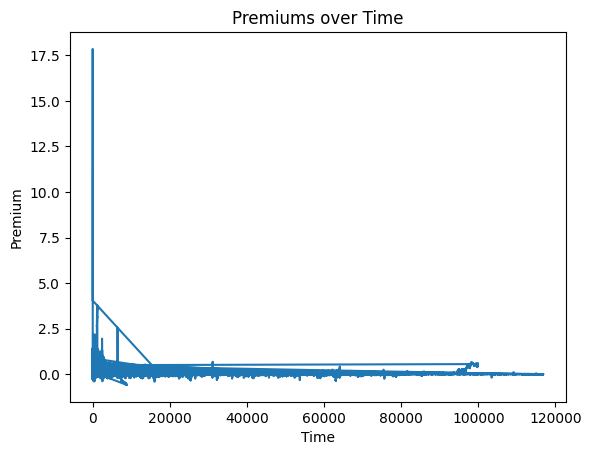

In [12]:
# Plot over time doesn't really make sense

# conc_dfs.set_index('datetime', inplace=True)
# conc_dfs.reset_index(drop=True, inplace=True)
conc_dfs['premium'].plot()
plt.xlabel('Time')
plt.ylabel('Premium')
plt.title('Premiums over Time')

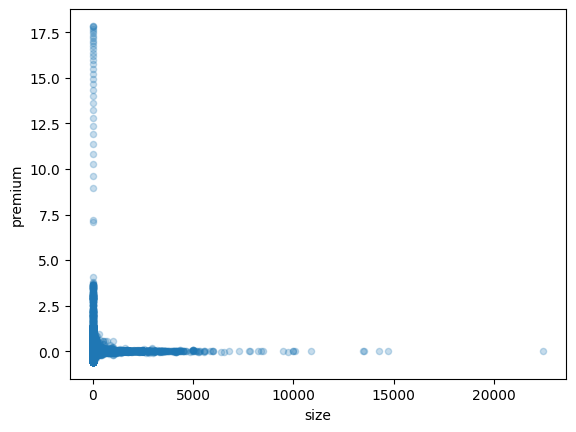

In [13]:
conc_dfs.plot.scatter(x = 'size', y = 'premium', alpha = 0.25)
# plt.xlim(-100, 1000)
plt.show()

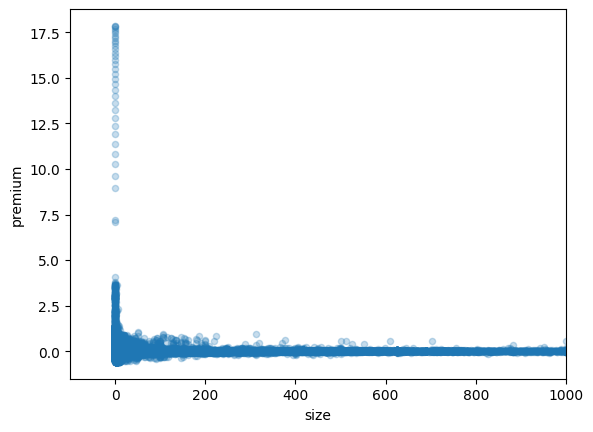

In [14]:
conc_dfs.plot.scatter(x = 'size', y = 'premium', alpha = 0.25)
plt.xlim(-100, 1000)
plt.show()